# Simple graphics

This notebook goes through different basic graphs that can be used in data analysis with practical applications. We will focus on the code to generate them and some little tricks to achieve more readable graphics.

It is important to remember that although this notebook uses data to exemplify graphs, the opposite is true in the actual application of data science. We must first think about the question to be answered and then design the visualization. This includes:

* Find the right graph for the data
* Group the data to highlight a pattern that helps answer the initial question.
* Find the most effective visual encodings to communicate this pattern (although we won't talk about that much in this notebook).

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn

seaborn.set_context('talk')

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_89041/3068297629.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
url = '../data/sysarmy_survey_2020_processed.csv'

# Or we can use this other URL if we are in google colab and we want to read the dataset directly from a server.
# url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'

df = pd.read_csv(url)

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
df[:3]

profile_gender  profile_age work_country                    work_province  \
0         Female           26    Argentina  Ciudad Autónoma de Buenos Aires   
1           Male           29    Argentina                       Corrientes   
2         Female           22    Argentina  Ciudad Autónoma de Buenos Aires   

   profile_years_experience  work_years_in_company  \
0                       3.0                    3.0   
1                       5.0                    2.0   
2                       2.0                    0.0   

   work_years_in_current_position  work_people_in_charge_of  \
0                             3.0                         0   
1                             2.0                         4   
2                             0.0                         0   

  profile_studies_level profile_studies_level_state  ...    salary_has_bonus  \
0            University                     Ongoing  ...                  No   
1            University                     Ongoing  ...  Less than a salary   
2             Secondary                    Complete  ...          One salary   

  salary_inflation_adjustment_2020  \
0                               No   
1                              One   
2                               No   

  salary_percentage_inflation_adjustment_2020  \
0                                         0.0   
1                                        10.0   
2                                         0.0   

  salary_month_last_inflation_adjustment work_has_violence_situations  \
0                                      0            In my current job   
1                                      1                        Never   
2                                      0            In a previous job   

  profile_has_disabilities_hiring_difficulties company_employee_number  \
0                                          NaN                501-1000   
1                                           No                 201-500   
2                                           No               2001-5000   

                      company_main_activity company_recommended  \
0  Services / Software Consulting / Digital                   7   
1                          Other industries                   8   
2                          Other industries                   6   

  company_diversity_policies  
0                          2  
1                          9  
2                          9  

[3 rows x 43 columns]

## Tables

Like all the ones we've been using so far, tables are often left out of visualizations. However, they are one of the most powerful forms of representation. We usually start from a table to generate more complex visualizations, but this does not mean that generating good tables is not helpful in the communication process.

* Show exact amounts
* Represent any type of data
* They are universally accessible
* They are easy to create
* Allow comparing many variables

Pandas also allows us other simple operations of descriptive statistics. In the next cell, we are describing the distribution of the net salary column, for different levels of studies.

In [5]:
df_studies_level_median = df[['profile_studies_level', "salary_monthly_NET"]].groupby('profile_studies_level').median()
df_studies_level_median

salary_monthly_NET
profile_studies_level                    
Doctorate                         88900.0
Postdoc                          266250.0
Postgraduate                     100000.0
Primary                           87500.0
Secondary                         65000.0
Terciary                          68000.0
University                        80000.0

In [6]:
import plotly.io as pio
pio.renderers.default = "notebook"

column_names = ['profile_studies_level', "salary_monthly_NET"]
fig = go.Figure(
    data=[go.Table(
        header=dict(values=column_names),
        cells=dict(values=[df_studies_level_median.reset_index()["profile_studies_level"],
                           df_studies_level_median.reset_index()["salary_monthly_NET"]]
                   ))
    ])
fig.show()

## Bar/Column charts

* x-axis: categorical variable
* y-axis: numeric variable
(It can be done "lying down" also reversing the order)

They compare numerical quantities between categorical variables. They are one of the most faithful and easy to perceive encodings. That is, we can read the quantities represented more accurately than in other types of graphs.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Primary'),
  Text(1, 0, 'Secondary'),
  Text(2, 0, 'Terciary'),
  Text(3, 0, 'University'),
  Text(4, 0, 'Postgraduate'),
  Text(5, 0, 'Doctorate'),
  Text(6, 0, 'Postdoc')])

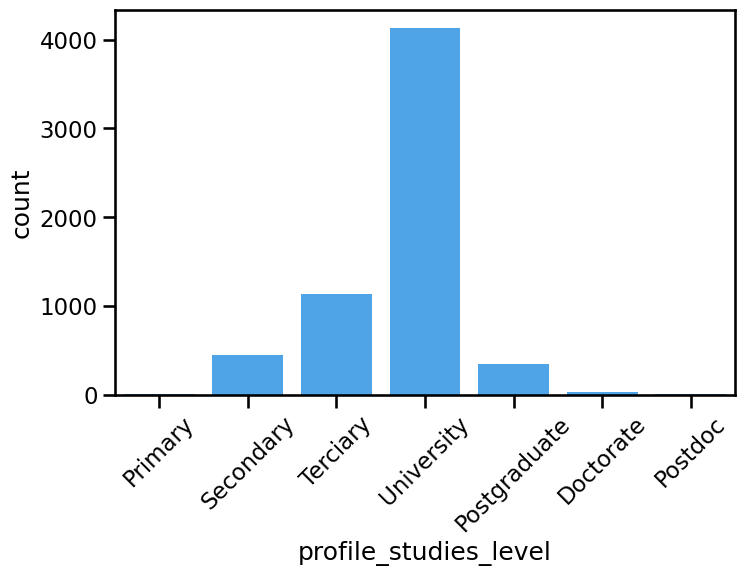

In [7]:
sorted_studies_levels = ["Primary", "Secondary", "Terciary", "University", "Postgraduate", "Doctorate", "Postdoc"]
fig = plt.figure(figsize=(8,5))
seaborn.countplot(data=df, x='profile_studies_level',
                  color=BLUE, order=sorted_studies_levels)
plt.xticks(rotation=45)

In [8]:
df_studies_level_count = (
    df["profile_studies_level"]
      .value_counts()
      .reset_index()
      .rename(columns={"index": "profile_studies_level",
                       "profile_studies_level": "count"})
)
df_studies_level_count

count  count
0    University   4133
1      Terciary   1135
2     Secondary    449
3  Postgraduate    342
4     Doctorate     30
5       Postdoc      4
6       Primary      2

In [9]:
fig = px.bar(df_studies_level_count, x='profile_studies_level', y='count', category_orders=dict(profile_studies_level=sorted_studies_levels))
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['count', 'count'] but received: profile_studies_level

They are very versatile graphics, but they are not always suitable. The more bars are plotted, the less attention is paid to variation from one bar to another, and the more apparent the overall distribution. Bar charts are also very sensitive to ordering, since the farther apart the bars are, the more difficult it is to compare them. On the other hand, the difference in the size of each bar may encode only a certain amount of information. For example, if the bars are large in height, a small difference between them will go unnoticed, while if the bars are small, the same difference will be more noticeable.

Bar charts are best suited for viewing categorical variables, such as educational level. On the y-axis we must put a numeric variable. In this case, we are going to use the v.a. *average net salary*. For that, we can very easily pass `seaborn` a function to calculate on the salary column using the `estimator` parameter.

Note: The value of the `estimator` defaults to the mean, but now we make it explicit. We could have selected another function, like `numpy.median`, or defined a new one.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Primary'),
  Text(1, 0, 'Secondary'),
  Text(2, 0, 'Terciary'),
  Text(3, 0, 'University'),
  Text(4, 0, 'Postgraduate'),
  Text(5, 0, 'Doctorate'),
  Text(6, 0, 'Postdoc')])

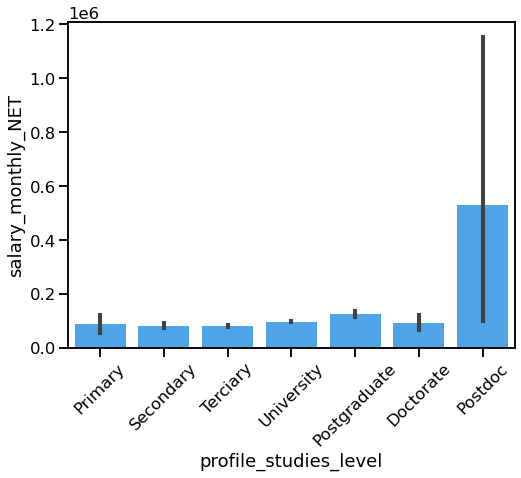

In [ ]:
fig = plt.figure(figsize=(8,6))
seaborn.barplot(data=df,
                y="salary_monthly_NET", x='profile_studies_level',
                estimator=numpy.mean, ci=95,
                color=BLUE, order=sorted_studies_levels)
plt.xticks(rotation=45)

In [ ]:
df_studies_level_mean = (
    df[["profile_studies_level", "salary_monthly_NET"]]
      .groupby("profile_studies_level")
      .agg(salary_monthly_NET_mean=("salary_monthly_NET", "mean"),
           salary_monthly_NET_std=("salary_monthly_NET", "std"))
      .reset_index()
)
df_studies_level_mean

profile_studies_level  salary_monthly_NET_mean  salary_monthly_NET_std
0             Doctorate             91629.115517            80804.752362
1               Postdoc            529875.000000           664606.446829
2          Postgraduate            124166.795300           110533.626251
3               Primary             87500.000000            45961.940777
4             Secondary             82686.351857            89015.514211
5              Terciary             80814.433784            73045.051749
6            University             97410.224414            99056.902960

In [ ]:
fig = px.bar(df_studies_level_mean,
             x='profile_studies_level',
             y='salary_monthly_NET_mean',
             category_orders=dict(profile_studies_level=sorted_studies_levels),
                                  error_y="salary_monthly_NET_std")
fig.show()

In this graph we are using the height of the bars to represent the average of the salary estimates for each of the groups. However, this is not obvious at first glance. The user does not have enough information to infer the meaning of the vertical axis. Keep in mind that many times, the original name of the column does not represent the added information, and we have to change them.

Also, what do the black lines mean? They are the confidence intervals, which have a default value of 95. It indicates that the true population value of the statistic is in that range, with a confidence of 95%. So we see that (probably) for Doctorate and Postdoc, the range is much smaller since the sample is much larger. For other minority groups, we are uncertain of the true value of the population mean because the sample is too small.

This statistic is often difficult to interpret for non-statisticians, and it may be convenient to replace it with the sample standard deviation. Although we use the same visual encoding (the black lines), the values ​​we represent are completely different. If we use a confidence interval, we are talking about the distribution of the estimator of the population mean, which is a random variable that takes values ​​in all possible samples. On the other hand, if we use the standard deviation, we are talking about the value of the statistic in this sample. You can explore both values, but for this case, neither provides useful information for analysis.

With those observations, we can build a more representative graph.

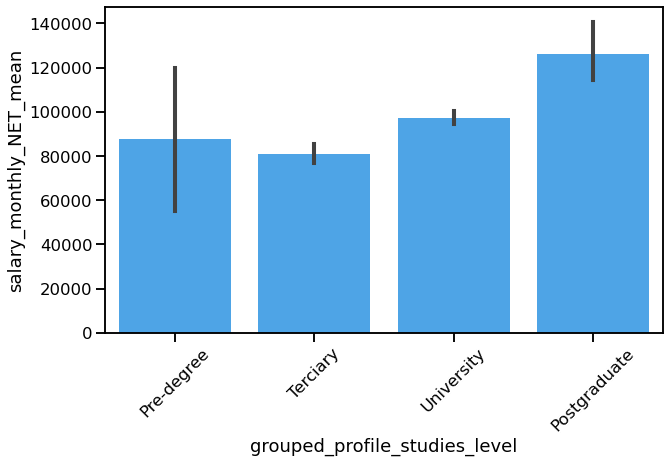

In [ ]:
new_groups = {
    'Postdoc': 'Postgraduate',
    'Doctorate': 'Postgraduate',
    'Primary': 'Pre-degree',
    'Secundary': 'Pre-degree'
}
order = ['Pre-degree', 'Terciary', 'University', 'Postgraduate']
grouped_studies_level = df.profile_studies_level.replace(new_groups)
fig = plt.figure(figsize=(10, 6))
seaborn.barplot(y=df["salary_monthly_NET"], x=grouped_studies_level,
                estimator=numpy.mean, ci=95,
                color=BLUE, order=order
                )
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("grouped_profile_studies_level")
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
new_groups = {
    'Postdoc': 'Postgraduate',
    'Doctorate': 'Postgraduate',
    'Primary': 'Pre-degree',
    'Secundary': 'Pre-degree'
}
order = ['Pre-degree', 'Terciary', 'University', 'Postgraduate']
grouped_studies_level = df.profile_studies_level.replace(new_groups)

df["grouped_profile_studies_level"] = grouped_studies_level

In [ ]:
df_studies_level_mean = (
    df[["grouped_profile_studies_level", "salary_monthly_NET"]]
      .groupby("grouped_profile_studies_level")
      .agg(salary_monthly_NET_mean=("salary_monthly_NET", "mean"),
           salary_monthly_NET_std=("salary_monthly_NET", "std"))
      .reset_index()
)
df_studies_level_mean

grouped_profile_studies_level  salary_monthly_NET_mean  \
0                  Postgraduate            126107.481314   
1                    Pre-degree             87500.000000   
2                     Secondary             82686.351857   
3                      Terciary             80814.433784   
4                    University             97410.224414   

   salary_monthly_NET_std  
0           131734.048822  
1            45961.940777  
2            89015.514211  
3            73045.051749  
4            99056.902960

In [ ]:
fig = px.bar(df_studies_level_mean,
             x='grouped_profile_studies_level',
             y='salary_monthly_NET_mean',
             category_orders=dict(profile_studies_level=order),
                                  error_y="salary_monthly_NET_std")
fig.show()

### Comparing categorical variables

We can use the `hue` parameter when we want to compare different groups. This is equivalent to adding another v.a. to the graph, which must be categorical.

In [ ]:
df.profile_studies_level_state.unique()

array(['Ongoing', 'Complete', 'Incomplete'], dtype=object)

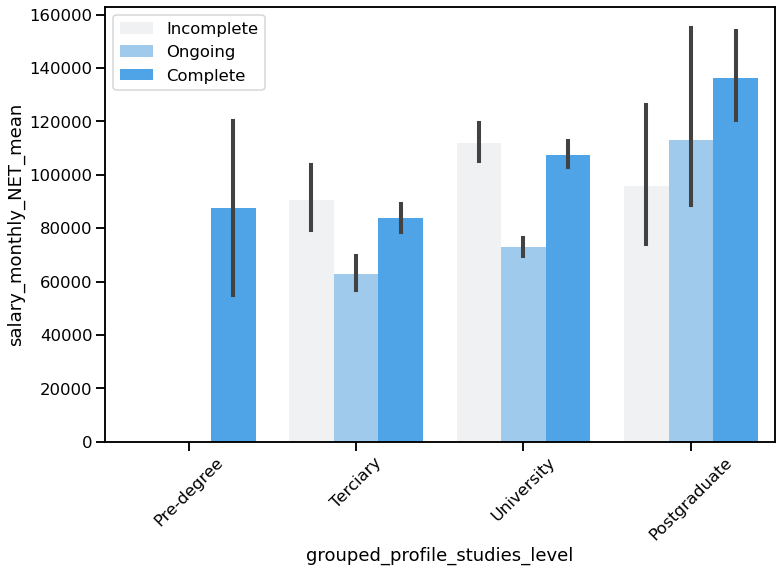

In [ ]:
hue_order = ['Incomplete', 'Ongoing', 'Complete']
fig = plt.figure(figsize=(12,8))
seaborn.barplot(y=df["salary_monthly_NET"], x=grouped_studies_level,
                hue=df.profile_studies_level_state,
                estimator=numpy.mean, ci=95,
                color=BLUE, order=order, hue_order=hue_order)
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("grouped_profile_studies_level")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')

In [ ]:
df["grouped_profile_studies_level"] = grouped_studies_level

In [ ]:
df_grouped_studies_level_mean = (
    df[["grouped_profile_studies_level", "profile_studies_level_state", "salary_monthly_NET"]]
      .groupby(["grouped_profile_studies_level", "profile_studies_level_state"])
      .mean()
      .reset_index()
      .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)
df_grouped_studies_level_mean

grouped_profile_studies_level profile_studies_level_state  \
0                   Postgraduate                    Complete   
1                   Postgraduate                  Incomplete   
2                   Postgraduate                     Ongoing   
3                     Pre-degree                    Complete   
4                      Secondary                    Complete   
5                      Secondary                  Incomplete   
6                      Secondary                     Ongoing   
7                       Terciary                    Complete   
8                       Terciary                  Incomplete   
9                       Terciary                     Ongoing   
10                    University                    Complete   
11                    University                  Incomplete   
12                    University                     Ongoing   

    salary_monthly_NET_mean  
0             136195.226486  
1              95980.705882  
2             113180.150851  
3              87500.000000  
4              84306.140665  
5              79562.904760  
6              41958.272727  
7              83642.760627  
8              90414.355140  
9              62852.213493  
10            107444.598895  
11            111842.764084  
12             72929.530923

In [ ]:
fig = px.bar(df_grouped_studies_level_mean,
             x='grouped_profile_studies_level',
             y='salary_monthly_NET_mean',
             color='profile_studies_level_state',
             barmode='group',
             category_orders=dict(grouped_profile_studies_level=order))
fig.show()

## Line charts

* y-axis: numeric variable
* x-axis: continuous numeric variable

It is effective for comparing *numerical quantities*. If we compare it with a bar chart, they have advantages and disadvantages. First, it suggests a stronger relationship between the data on the horizontal axis, which must be sequential. In addition to this, they can represent more values since the visual weight of each point is much less than a bar.

On the other hand, a line chart with a few points may be indicative of a trend that doesn't exist (or that we don't have enough data to show it).

<AxesSubplot:xlabel='profile_age', ylabel='salary_monthly_NET'>

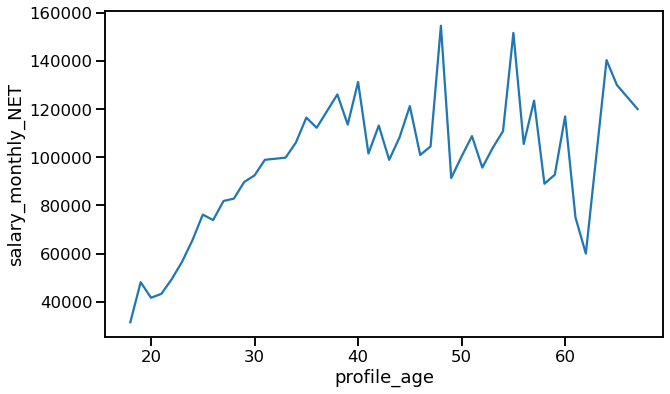

In [ ]:
plt.figure(figsize=(10,6))
max_age = 100
seaborn.lineplot(data=df[df.profile_age < max_age],
                 x='profile_age', y="salary_monthly_NET",
                 estimator='mean', ci=None)

In [ ]:
df_profile_age_mean = (
    df[["profile_age", "salary_monthly_NET"]]
        .loc[df.profile_age < max_age, :]
        .groupby("profile_age")
        .mean()
        .reset_index()
        .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)

In [ ]:
df_profile_age_mean

profile_age  salary_monthly_NET_mean
0            18             31500.500000
1            19             48123.750000
2            20             41651.722609
3            21             43283.541507
4            22             49377.348336
5            23             56623.454947
6            24             65546.499738
7            25             76198.275520
8            26             73901.149365
9            27             81831.884034
10           28             82817.030431
11           29             89723.770041
12           30             92488.156678
13           31             98945.972632
14           32             99379.394167
15           33             99849.304307
16           34            106154.846468
17           35            116443.371841
18           36            112236.592487
19           37            119188.136407
20           38            126083.995364
21           39            113576.461078
22           40            131261.416242
23           41            101553.720342
24           42            113161.173188
25           43             98948.487179
26           44            108198.666739
27           45            121248.559920
28           46            100952.834615
29           47            104469.000000
30           48            154627.386162
31           49             91385.227273
32           50            100348.391278
33           51            108784.047619
34           52             95711.192424
35           53            103846.153846
36           54            110833.388889
37           55            151643.333333
38           56            105528.750000
39           57            123503.000000
40           58             89000.000000
41           59             92750.000000
42           60            116947.666667
43           61             75000.000000
44           62             60000.000000
45           64            140333.333333
46           65            130000.000000
47           67            120000.000000

In [10]:
px.line(df_profile_age_mean, x='profile_age', y="salary_monthly_NET_mean")

NameError: name 'df_profile_age_mean' is not defined

We can also use the confidence interval in lineplots to indicate which parts are less reliable due to the number of samples.

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_89041/1926503305.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




<Axes: xlabel='profile_age', ylabel='salary_monthly_NET'>

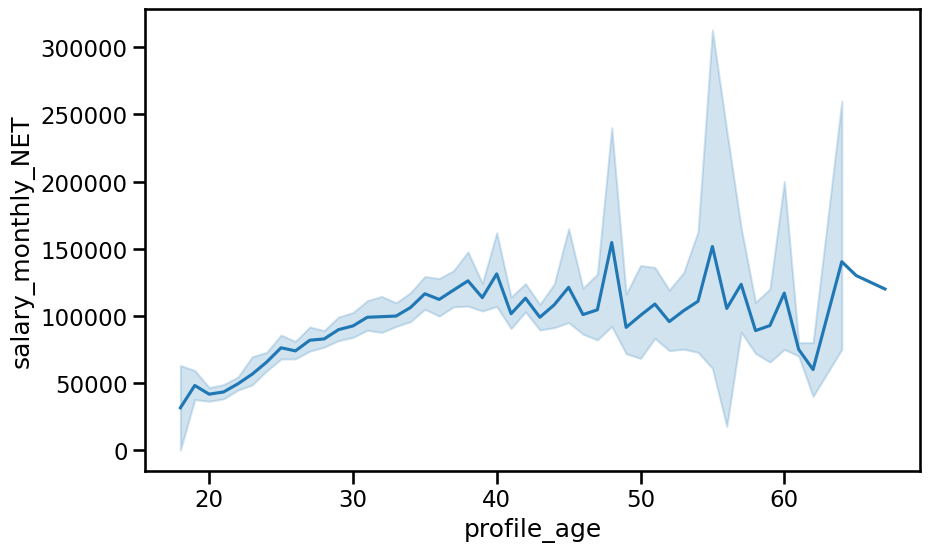

In [11]:
plt.figure(figsize=(10,6))
max_age = 100
seaborn.lineplot(data=df[df.profile_age < max_age],
                 x='profile_age', y="salary_monthly_NET",
                 estimator='mean', ci=95)

### Binarization or segmentation

In the graph above, we see that the line becomes very erratic from the age of 40. This is because very little data exists for each age from that point on.

To solve this problem, we can create age ranges of 5 years. The pandas.cut function works for this type of situation.

In [12]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [13]:
df['profile_age_segment'] = to_categorical(df.profile_age)

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 52000)]


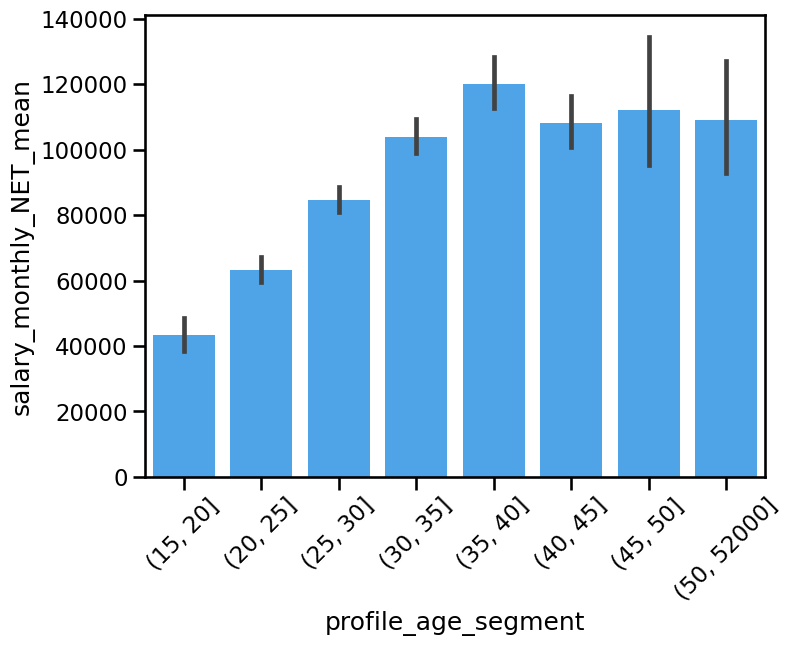

In [14]:
fig = plt.figure(figsize=(8,6))
seaborn.barplot(data=df, x='profile_age_segment', y="salary_monthly_NET",
                color=BLUE)
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("profile_age_segment")
plt.ticklabel_format(style='plain', axis='y')

In [15]:
df_age_segment_mean = (
    df[["profile_age_segment", "salary_monthly_NET"]]
      .groupby("profile_age_segment")
      .mean()
      .reset_index()
      .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)
df_age_segment_mean

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_89041/3435715209.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



profile_age_segment  salary_monthly_NET_mean
0            (15, 20]             43256.694706
1            (20, 25]             63173.999948
2            (25, 30]             84478.304952
3            (30, 35]            103902.181533
4            (35, 40]            120064.456842
5            (40, 45]            108146.269018
6            (45, 50]            112180.798418
7         (50, 52000]            109109.345896

In [16]:
df_age_segment_mean["profile_age_segment_casted"] = df_age_segment_mean["profile_age_segment"].astype('str')

In [17]:
df_age_segment_mean

profile_age_segment  salary_monthly_NET_mean profile_age_segment_casted
0            (15, 20]             43256.694706                   (15, 20]
1            (20, 25]             63173.999948                   (20, 25]
2            (25, 30]             84478.304952                   (25, 30]
3            (30, 35]            103902.181533                   (30, 35]
4            (35, 40]            120064.456842                   (35, 40]
5            (40, 45]            108146.269018                   (40, 45]
6            (45, 50]            112180.798418                   (45, 50]
7         (50, 52000]            109109.345896                (50, 52000]

In [18]:
fig = px.bar(df_age_segment_mean, x='profile_age_segment_casted', y='salary_monthly_NET_mean')
fig.show()

[Optional]

The graph above can also be displayed as a connected dot graph, but it is not the same as a line graph! We achieve a visually less "heavy" representation. In addition to that, we can use functions to transform the numbers corresponding to the salaries shown on each axis, called `ticks`

In [19]:
from matplotlib import ticker

# Formatter for salaries
@ticker.FuncFormatter
def k_formatter(x, pos):
    return f'{x / 1000:.0f}K'

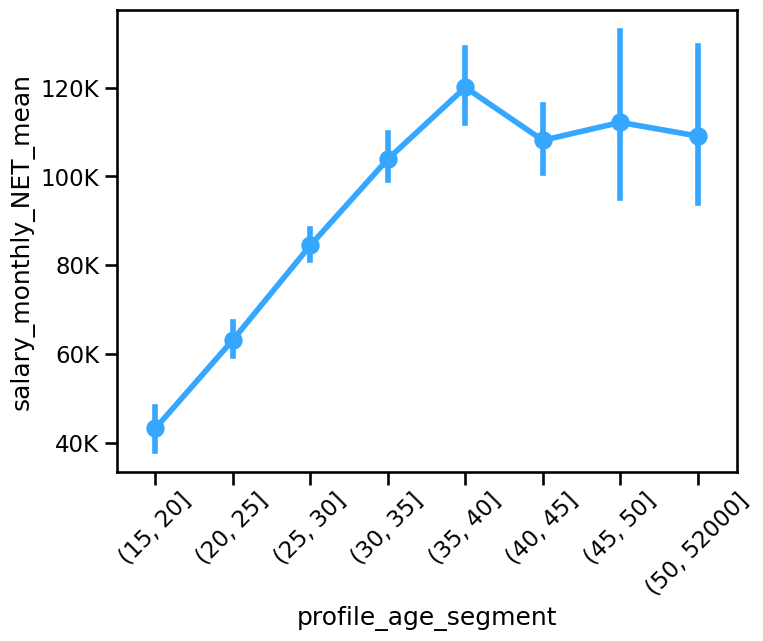

In [20]:
fig = plt.figure(figsize=(8,6))
seaborn.pointplot(data=df, x='profile_age_segment', y="salary_monthly_NET",
                  color=BLUE)
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("profile_age_segment")
plt.ticklabel_format(style='plain', axis='y')
fig.axes[0].yaxis.set_major_formatter(k_formatter)

## Dot plots (scatterplots)

* y-axis: continuous numeric variable
* x-axis: continuous numeric variable

It shows the relationship between 2 or 3 continuous numeric variables. Additionally, you can use the color and shape of the dots for categorical variables and the size for an extra numeric variable.

In the following graph, it is seen how, although age is a continuous variable, the scatterplot is not a visualization that allows you to find patterns in the data since the points overlap too much.

<Axes: xlabel='profile_age', ylabel='salary_monthly_NET'>

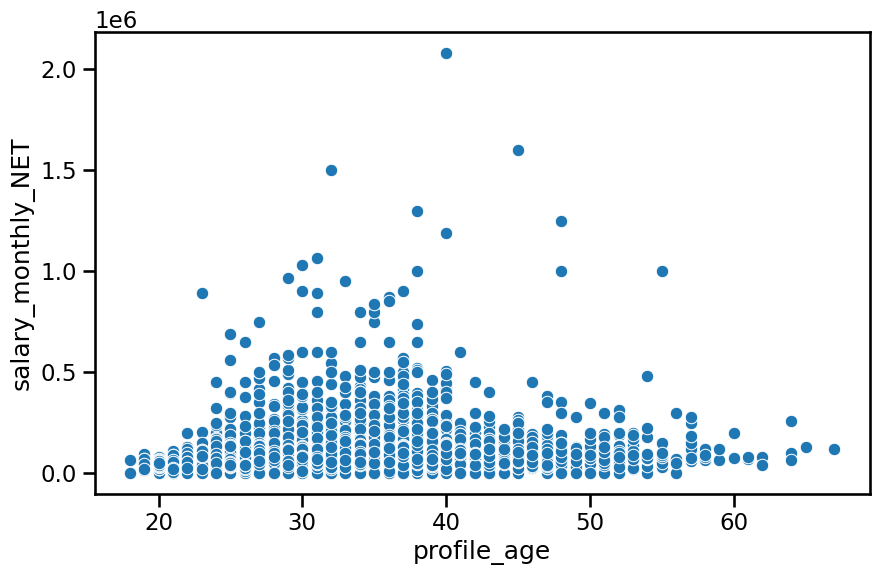

In [21]:
plt.figure(figsize=(10,6))
max_age = 100
seaborn.scatterplot(data=df[df.profile_age < max_age],
                    x='profile_age', y="salary_monthly_NET")

In [22]:
fig = px.scatter(df[df.profile_age < max_age], x="profile_age", y="salary_monthly_NET")
fig.show()

In this particular dataset, the scatterplot does not help us clarify the distributions of the variables. This happens for two reasons:
* The values accumulate in some ranges and are very sparse in others.
* There is too much data for each point to provide relevant information.

<Axes: xlabel='profile_years_experience', ylabel='salary_monthly_NET'>

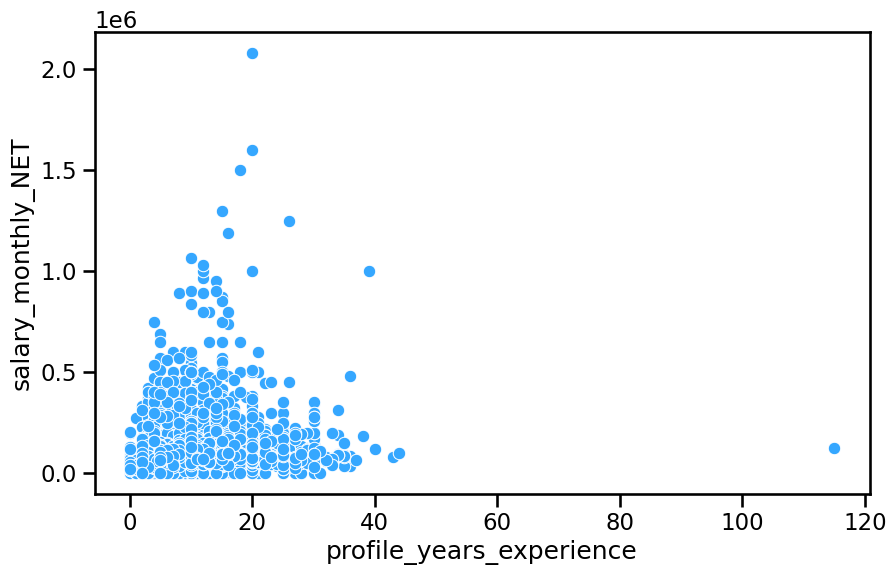

In [23]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df, #[(df.profile_years_experience < 20) & (df[salary_col] < 500000)],
                    x='profile_years_experience', y="salary_monthly_NET",
                    # marker=".",
                    # s=10,  # marker size
                    color=BLUE)

In [24]:
fig = px.scatter(df, x="profile_years_experience", y="salary_monthly_NET")
fig.show()

However, the power of scatterplots lies in the fact that the graphic element used (the point) has a very low visual weight, and therefore we can encode multiple variables in the same visualization.

In [25]:
df['salary_is_usd_bool'] = ~df.salary_in_usd.isna()
df.salary_is_usd_bool.value_counts()

salary_is_usd_bool
False    5419
True      676
Name: count, dtype: int64

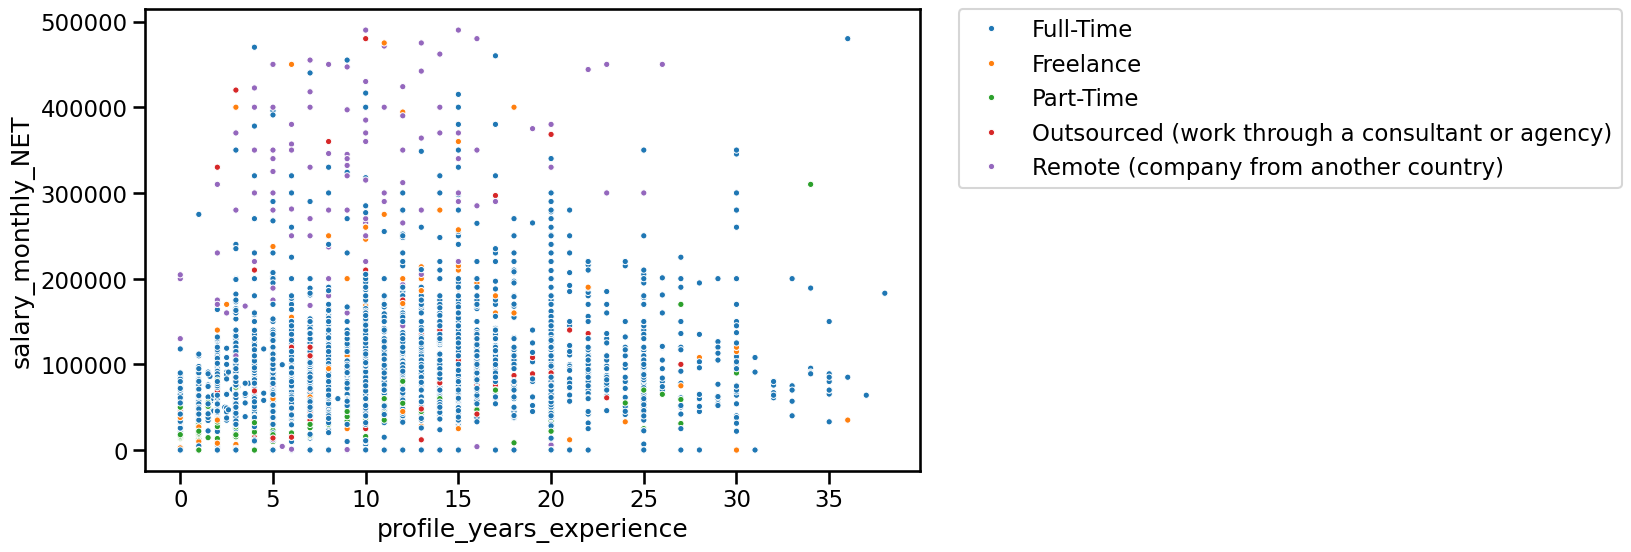

In [26]:
plt.figure(figsize=(10,6))
mask = (df['profile_years_experience'] < 40) & (df["salary_monthly_NET"] < 500000)
seaborn.scatterplot(data=df[mask], # .sample(500), 
                    x='profile_years_experience', y="salary_monthly_NET",
                    marker='.',
                    hue='work_contract_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [27]:
fig = px.scatter(df, x="profile_years_experience", y="salary_monthly_NET", color="work_contract_type")
fig.show()

[Optional]

To avoid overlapping points, only a sample of the data can be plotted.

For some analyses, it may be convenient that said sample is not random. For example, when we want to include all or most of the records of a subpopulation.

In [28]:
fig = px.scatter(df.sample(1000), x="profile_years_experience", y="salary_monthly_NET", color="work_contract_type")
fig.show()